In [35]:
import findspark
findspark.init() #  Adds `pyspark` to `sys.path` at runtime
import pyspark 
from pyspark.sql import SQLContext
import seaborn as sns

# Load Spark Kernel
Using `findspark`, but many other ways exist too. See ([Installing Spark](https://spark.apache.org/downloads.html))

In [51]:
pyspark.__version__

'3.0.1'

In [3]:
! echo $JAVA_HOME

/Library/Java/JavaVirtualMachines/jdk-14.0.1.jdk/Contents/Home


In [4]:
! echo $SPARK_HOME

/usr/local/spark


Create connection to Spark cluster

In [5]:
sc = pyspark.SparkContext(appName="shparkley_example")

In [12]:
sql_context = SQLContext(sc)

## Verify it's started using `jps`


In [6]:
! jps -lvm | grep -i spark

12042 org.apache.spark.deploy.SparkSubmit pyspark-shell -Xmx1g


 `org.apache.spark.deploy.SparkSubmit pyspark-shell` is running -- looks good. 

[Look more at configuration:](https://spark.apache.org/docs/latest/cluster-overview.html)
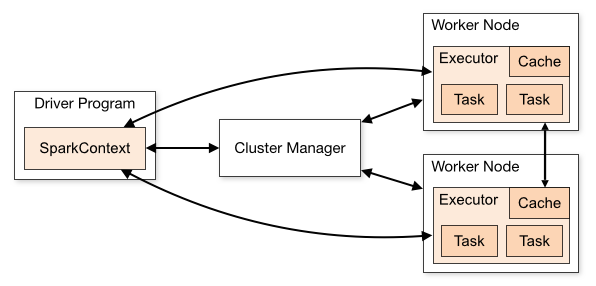

In [41]:
sc.getConf().getAll()

[('spark.app.name', 'shparkley_example'),
 ('spark.driver.host', '192.168.1.2'),
 ('spark.rdd.compress', 'True'),
 ('spark.app.id', 'local-1603051561351'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.port', '55471')]

In [52]:
sc.defaultParallelism, sc.defaultMinPartitions

(8, 2)

This means that by default, `pyspark.DataFrame`s will be created with 8 partitions. 

This is because `sc.parallelize` [here (link)](https://github.com/apache/spark/blob/97605cd1269987ed5ba3013a5f8497375ce8913e/python/pyspark/sql/session.py#L452) is used to convert from local-memory `DataFrame` which uses its `defaultParallelism`. 

There is [no obvious way](https://stackoverflow.com/a/28793407/588437) to get the number of [**executors**](https://spark.apache.org/docs/latest/cluster-overview.html) from the `pyspark` API. 


# Load Sample Dataset

In [8]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
spark_iris = sql_context.createDataFrame(iris)  # schema is None, so inferring types..
spark_iris

DataFrame[sepal_length: double, sepal_width: double, petal_length: double, petal_width: double, species: string]

Types look reasonable. 

In [53]:
spark_iris.rdd.getNumPartitions()

8

Eight, as foreshadowed. 